In [1]:
#Packages
import openpyxl
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
import subprocess
import numpy as np
#Helper functions
def plot_scatter_mul(dataframe, guide, title, xlabel, ylabel, legend_label):
    i = 0
    if guide == 'x':
        for index, row in df.iterrows():
            if index % 2 != 0: 
                i+= 1
                plt.scatter(list(element + 1 for element in list(range(df.shape[1]))), df.iloc[index], label=legend_label + f'{i}')
    elif guide == 'y':
        for index, row in df.iterrows():
            if index % 2 == 0: 
                i+= 1
                plt.scatter(list(element + 1 for element in list(range(df.shape[1]))), df.iloc[index], label=legend_label + f'{i}')
    else: 
        raise Exception('Select the fiber x or y')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

def RyR(dataframe, guide):
    i = 0
    dfx = []
    dfy = []
    std = dataframe.iloc[:, :-2].std(axis=1)
    if guide == 'x':
        for index, row in df_plus_limits.iterrows():
            if index % 2 != 0: 
                i+= 1
                RyR = (6*std.iloc[index]/(row.iloc[-1]-row.iloc[-2]))*100
                Pass = "Correcto" if RyR <= 10 else ("Fallo ligero" if 10 <= RyR <= 25 else "Fallo considerable")
                print(f'RyR Guía fbx {i}: ' + str(RyR) +' %' + ' Estatus: ' + Pass)
                dfx.append(float(RyR))
        dfx = pd.Series(dfx)
        print("")
        return dfx
    elif guide == 'y':
        for index, row in df_plus_limits.iterrows():
            if index % 2 == 0: 
                i+= 1
                RyR = (6*std.iloc[index]/(row.iloc[-1]-row.iloc[-2]))*100
                Pass = "Correcto" if RyR <= 10 else ("Fallo ligero" if 10 <= RyR <= 25 else "Fallo considerable")
                print(f'RyR Guía fby {i}: ' + str(RyR) +' %' + ' Estatus: ' + Pass)
                dfy.append(RyR)
        dfy = pd.Series(dfy)
        print("")
        return dfy
    else: 
        raise Exception('Select the fiber x or y')

def z_score_filter(dataframe, threshold):
    rows = []
    MEAS = dataframe.iloc[:, :-2]
    limits = dataframe.iloc[:, -2:]
    for index, row in MEAS.iterrows():
        z_scores = (row - row.mean()) / row.std()
        filtered_row = np.where(abs(z_scores) <= threshold, row, np.nan)
        rows.append(pd.Series(filtered_row, index=row.index))  # Convert to pandas Series
    filtered_df = pd.concat(rows, axis=0)  # Concatenate rows horizontally
    filtered_df = pd.concat([filtered_df, limits], axis=0)  # Concatenate with limits
    print(filtered_df)
    return filtered_df

Data Extraction

In [2]:
data = pd.read_excel("./2_Results/Target.xlsx", header=None)
df = data.iloc[3:, 1:-2] #Slices the dataframe, deleting the first empty rows and the columns for tags and df_plus_limits
df = df.reset_index(drop=True) #Resets the rows index to start in zero again
df.columns = range(df.shape[1]) #Resets the columns index to start in zero again
#print(df)

Data Plotting

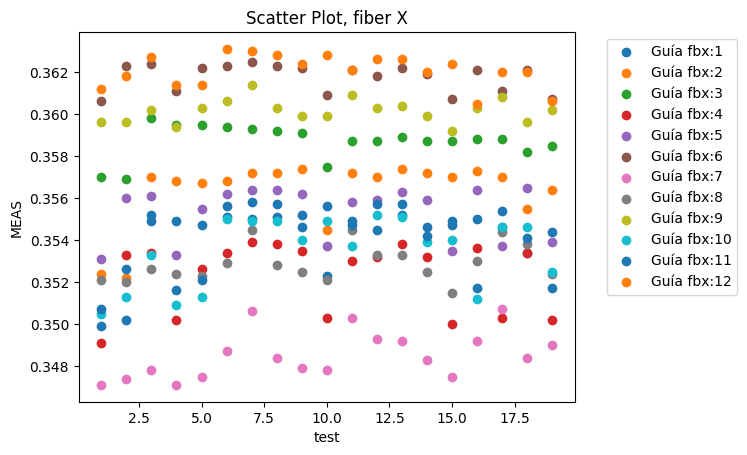

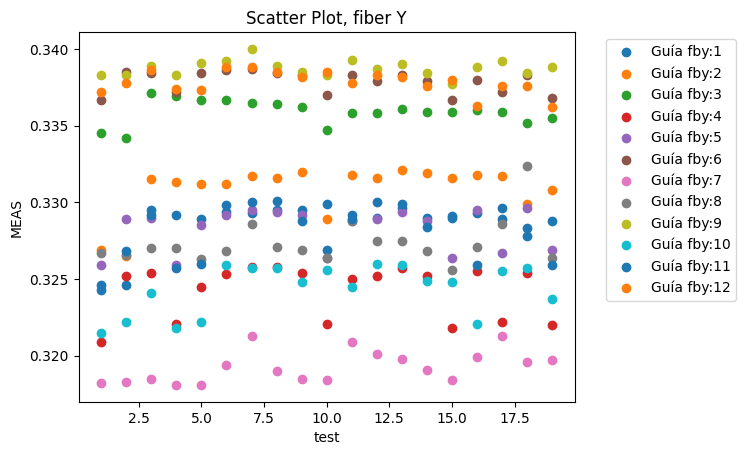

In [3]:
plot_scatter_mul(df, 'x', 'Scatter Plot, fiber X', 'test', 'MEAS', f'Guía fbx:')
plot_scatter_mul(df, 'y', 'Scatter Plot, fiber Y', 'test', 'MEAS', f'Guía fby:')

In [4]:
df_plus_limits = data.iloc[3:, 1:] #Grabs both the measures and the limits
df_plus_limits = df_plus_limits.reset_index(drop=True) #Resets the rows index to start in zero again
df_plus_limits.columns = range(df_plus_limits.shape[1]) #Resets the columns index to start in zero again
dfx = RyR(df_plus_limits, 'x')
dfy = RyR(df_plus_limits, 'y')



RyR Guía fbx 1: 29.231782777545206 % Estatus: Fallo considerable
RyR Guía fbx 2: 28.804410597779306 % Estatus: Fallo considerable
RyR Guía fbx 3: 12.713263127069194 % Estatus: Fallo ligero
RyR Guía fbx 4: 30.107503162054694 % Estatus: Fallo considerable
RyR Guía fbx 5: 23.0739115376958 % Estatus: Fallo ligero
RyR Guía fbx 6: 10.515922847210058 % Estatus: Fallo ligero
RyR Guía fbx 7: 20.5096723027755 % Estatus: Fallo ligero
RyR Guía fbx 8: 15.94175275600955 % Estatus: Fallo ligero
RyR Guía fbx 9: 8.70202990062155 % Estatus: Correcto
RyR Guía fbx 10: 29.827853360782193 % Estatus: Fallo considerable
RyR Guía fbx 11: 31.55622400267868 % Estatus: Fallo considerable
RyR Guía fbx 12: 12.08054805657159 % Estatus: Fallo ligero

RyR Guía fby 1: 37.667129324902824 % Estatus: Fallo considerable
RyR Guía fby 2: 39.608611503852785 % Estatus: Fallo considerable
RyR Guía fby 3: 16.486562599723097 % Estatus: Fallo ligero
RyR Guía fby 4: 41.02846252106093 % Estatus: Fallo considerable
RyR Guía fby 5: 32

In [5]:
filtered_dfx = z_score_filter(df_plus_limits, 2000000)

""" filtered_dfx.reset_index(drop=True, inplace=True)
print(filtered_dfx)
RyR(filtered_dfx, 'x')
 """

        0      19     20
0   0.3243    NaN    NaN
1   0.3246    NaN    NaN
2   0.3295    NaN    NaN
3   0.3292    NaN    NaN
4   0.3289    NaN    NaN
..     ...    ...    ...
19     NaN  0.325  0.358
20     NaN  0.310  0.335
21     NaN  0.325  0.358
22     NaN  0.310  0.339
23     NaN  0.325  0.363

[480 rows x 3 columns]


" filtered_dfx.reset_index(drop=True, inplace=True)\nprint(filtered_dfx)\nRyR(filtered_dfx, 'x')\n "

In [6]:
def z_score_filter(dataframe):
    rows = []
    MEAS = dataframe.iloc[:, :-2]
    limits = dataframe.iloc[:, -2:]    
    for row in df.iterrows():
        rows.append(row) 
    print(rows)
    return rows

print(df_plus_limits.iloc[0:5,0:5])
z_score_filter(df_plus_limits.iloc[0:5,0:5])

        0       1       2       3       4
0  0.3243  0.3246  0.3295  0.3292  0.3289
1  0.3499  0.3502  0.3552  0.3549  0.3547
2  0.3269  0.3265  0.3315  0.3313  0.3312
3  0.3524  0.3522  0.3570  0.3568  0.3567
4  0.3345  0.3342  0.3371  0.3369  0.3367
[(0, 0     0.3243
1     0.3246
2     0.3295
3     0.3292
4     0.3289
5     0.3294
6     0.3293
7     0.3295
8     0.3295
9     0.3269
10    0.3292
11    0.3290
12    0.3296
13    0.3290
14    0.3290
15    0.3293
16    0.3289
17    0.3278
18    0.3288
Name: 0, dtype: float64), (1, 0     0.3499
1     0.3502
2     0.3552
3     0.3549
4     0.3547
5     0.3551
6     0.3550
7     0.3551
8     0.3552
9     0.3523
10    0.3549
11    0.3545
12    0.3552
13    0.3546
14    0.3547
15    0.3550
16    0.3546
17    0.3534
18    0.3544
Name: 1, dtype: float64), (2, 0     0.3269
1     0.3265
2     0.3315
3     0.3313
4     0.3312
5     0.3312
6     0.3317
7     0.3316
8     0.3320
9     0.3289
10    0.3318
11    0.3316
12    0.3321
13    0.3319
14    0

[(0,
  0     0.3243
  1     0.3246
  2     0.3295
  3     0.3292
  4     0.3289
  5     0.3294
  6     0.3293
  7     0.3295
  8     0.3295
  9     0.3269
  10    0.3292
  11    0.3290
  12    0.3296
  13    0.3290
  14    0.3290
  15    0.3293
  16    0.3289
  17    0.3278
  18    0.3288
  Name: 0, dtype: float64),
 (1,
  0     0.3499
  1     0.3502
  2     0.3552
  3     0.3549
  4     0.3547
  5     0.3551
  6     0.3550
  7     0.3551
  8     0.3552
  9     0.3523
  10    0.3549
  11    0.3545
  12    0.3552
  13    0.3546
  14    0.3547
  15    0.3550
  16    0.3546
  17    0.3534
  18    0.3544
  Name: 1, dtype: float64),
 (2,
  0     0.3269
  1     0.3265
  2     0.3315
  3     0.3313
  4     0.3312
  5     0.3312
  6     0.3317
  7     0.3316
  8     0.3320
  9     0.3289
  10    0.3318
  11    0.3316
  12    0.3321
  13    0.3319
  14    0.3316
  15    0.3318
  16    0.3317
  17    0.3299
  18    0.3308
  Name: 2, dtype: float64),
 (3,
  0     0.3524
  1     0.3522
  2     0.3